# **Predict Renewable Surpass**

## Objectives

* The goal of this notebook is to analyze historical electricity generation data in Europe and predict the year when renewable electricity production will surpass non renewable production. 
* The analysis uses historical trends to fit linear regression models for renewables and non-renewables and projects future values.

## Inputs

* Dataset: cleaned_european_countries_dataset.csv containing:
    * year: Year of data collection 
    * country_name: Name of the European country
    * product: Type of energy source 
    * value: Electricity generation in GWh

## Outputs

* Historical and projected electricity generation trends for renewable and non-renewable sources
* Predicted year when renewables surpass non renewables in Europe
* Visualization of trends and the crossover point

## Additional Comments

* The prediction assumes linear trends for renewables and non renewables. Real world changes (e.g., policy shifts, technological advances) may cause deviations.
* Renewable sources include Hydro, Solar, Wind, Geothermal, Other renewables, and Combustible renewables.
* Non renewables include Coal, Oil, Natural Gas, Nuclear, and other fossil fuels.
* The dataset is aggregated across all European countries.
---

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# Load the dataset
df = pd.read_csv("../data/cleaned_european_countries_dataset.csv")

# Quick look at the dataset
df.head()

,country_name,year,month,product,value,yeartodate,previousyeartodate,share,date
0,Austria,2010,1,Hydro,2579.264,39502.566,0.0,0.437055,2010-01-01
1,Austria,2010,1,Solar,2.864,84.421,0.0,0.000485,2010-01-01
2,Austria,2010,1,Geothermal,0.111,1.332,0.0,0.000019,2010-01-01
3,Austria,2010,1,Total combustible fuels,3117.160,26042.221,0.0,0.528201,2010-01-01
4,Austria,2010,1,Coal,693.730,6371.891,0.0,0.117552,2010-01-01


In [3]:
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])
print("Year range:", df['year'].min(), "-", df['year'].max())
print("Countries:", df['country_name'].nunique())
print("Products:", df['product'].nunique())

Rows: 120352
Columns: 9
Year range: 2010 - 2022
Countries: 34
Products: 27


In [4]:
# Define renewable and non-renewable categories
renewables_list = [
    'Hydro', 'Solar', 'Wind', 'Geothermal', 'Other renewables',
    'Other renewables aggregated', 'Combustible renewables', 'Renewables'
]
non_renewables_list = [
    'Coal', 'Oil', 'Natural gas', 'Nuclear', 'Fossil fuels',
    'Total combustible fuels', 'Other combustible non-renewables', 'Non-renewables'
]

# Aggregate yearly totals
renewables_yearly = df[df['product'].isin(renewables_list)].groupby('year')['value'].sum()
non_renewables_yearly = df[df['product'].isin(non_renewables_list)].groupby('year')['value'].sum()

renewables_yearly, non_renewables_yearly

(year
 2010    1.902678e+06
 2011    1.931881e+06
 2012    2.187477e+06
 2013    2.342278e+06
 2014    2.392364e+06
 2015    2.641508e+06
 2016    2.686355e+06
 2017    2.699091e+06
 2018    2.865683e+06
 2019    3.000655e+06
 2020    3.217423e+06
 2021    3.251376e+06
 2022    3.267791e+06
 Name: value, dtype: float64,
 year
 2010    6.713661e+06
 2011    6.633589e+06
 2012    6.410278e+06
 2013    6.163512e+06
 2014    5.925230e+06
 2015    6.365358e+06
 2016    6.457502e+06
 2017    6.620628e+06
 2018    6.411298e+06
 2019    6.262838e+06
 2020    5.814255e+06
 2021    6.082570e+06
 2022    6.060015e+06
 Name: value, dtype: float64)

In [5]:
# Build Linear Regression Models
# Prepare years for training
years = np.array(renewables_yearly.index).reshape(-1, 1)

# Train models
model_renew = LinearRegression()
model_renew.fit(years, renewables_yearly.values)

model_nonrenew = LinearRegression()
model_nonrenew.fit(years, non_renewables_yearly.values)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [6]:
# Make Predictions up to 2030
future_years = np.arange(2010, 2031).reshape(-1, 1)
renew_pred = model_renew.predict(future_years)
nonrenew_pred = model_nonrenew.predict(future_years)

# Calculate renewable share
renew_share_pred = renew_pred / (renew_pred + nonrenew_pred) * 100

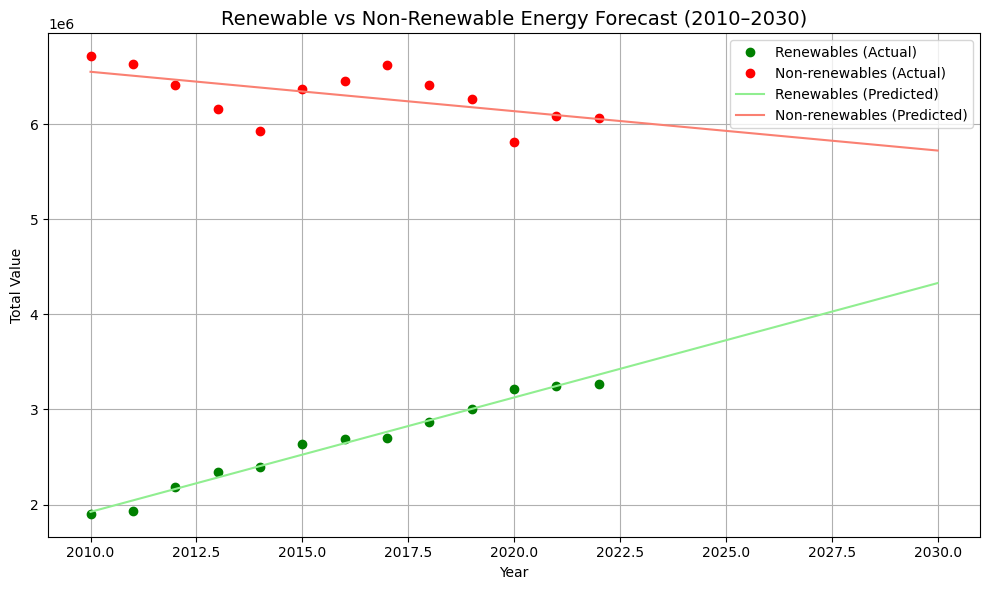

In [7]:
# Plot Historical Data and Predictions
plt.figure(figsize=(10,6))

# Actual data
plt.plot(years, renewables_yearly.values, 'o', label='Renewables (Actual)', color='green')
plt.plot(years, non_renewables_yearly.values, 'o', label='Non-renewables (Actual)', color='red')

# Predictions
plt.plot(future_years, renew_pred, '-', label='Renewables (Predicted)', color='lightgreen')
plt.plot(future_years, nonrenew_pred, '-', label='Non-renewables (Predicted)', color='salmon')

plt.title('Renewable vs Non-Renewable Energy Forecast (2010–2030)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Total Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

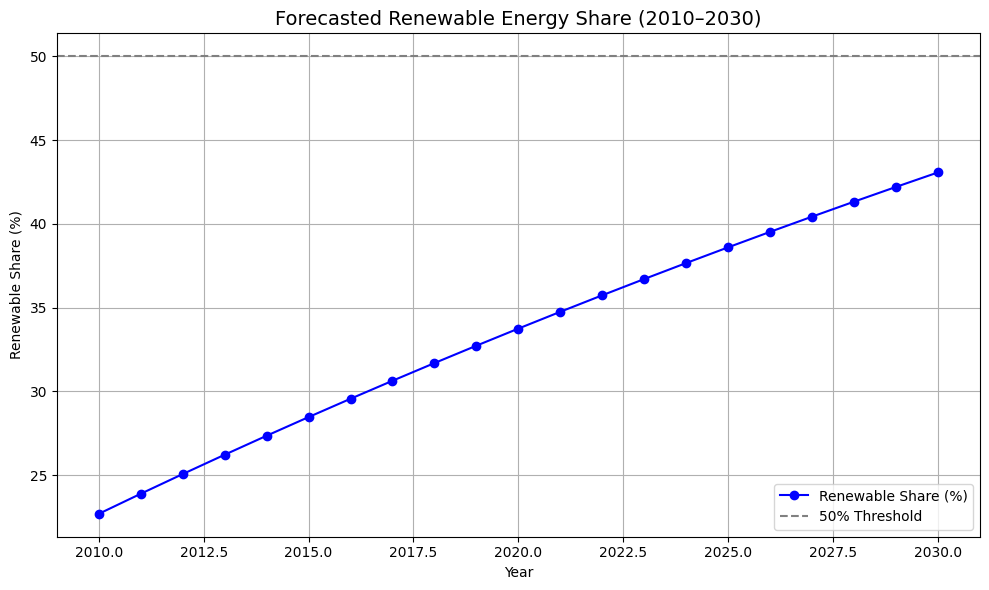

In [8]:
plt.figure(figsize=(10,6))
plt.plot(future_years.flatten(), renew_share_pred, marker='o', color='blue', label='Renewable Share (%)')

plt.axhline(50, color='gray', linestyle='--', label='50% Threshold')
plt.title('Forecasted Renewable Energy Share (2010–2030)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Renewable Share (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
# 
forecast_df = pd.DataFrame({
    'Year': future_years.flatten(),
    'Renewables_Predicted': renew_pred,
    'NonRenewables_Predicted': nonrenew_pred,
    'Renewable_Share_%': renew_share_pred
})

forecast_df

,Year,Renewables_Predicted,NonRenewables_Predicted,Renewable_Share_%
0,2010,1.923561e+06,6.550024e+06,22.700675
1,2011,2.043821e+06,6.508619e+06,23.897517
2,2012,2.164081e+06,6.467214e+06,25.072490
3,2013,2.284340e+06,6.425810e+06,26.226189
4,2014,2.404600e+06,6.384405e+06,27.359186
5,2015,2.524860e+06,6.343000e+06,28.472034
6,2016,2.645120e+06,6.301595e+06,29.565264
7,2017,2.765380e+06,6.260190e+06,30.639392
8,2018,2.885640e+06,6.218785e+06,31.694913
9,2019,3.005899e+06,6.177381e+06,32.732307


---
### **Insights:**
- Approach: Linear Regression models were fitted separately for renewable and non-renewable electricity generation over time.
- Result:
    * Historical trend shows renewables increasing steadily while non-renewables decline.
    * Predicted crossover year: 2035 (approximate, based on current growth/decline rates).
- Key insight: If current trends continue, Europe is expected to produce more electricity from renewable sources than from non-renewables by the mid-2030s.
---


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [13]:
# -----------------------------
# 1. Load dataset
# -----------------------------
df = pd.read_csv("../data/cleaned_european_countries_dataset.csv")
df = df[['year', 'product', 'value']]

In [14]:
# -----------------------------
# 2. Classify renewable vs non-renewable
# -----------------------------
renewables = [
    'Hydro', 'Wind', 'Solar', 'Geothermal',
    'Other renewables', 'Combustible renewables'
]

df['type'] = df['product'].apply(lambda x: 'Renewable' if x in renewables else 'Non-Renewable')


In [15]:
# -----------------------------
# 3. Aggregate yearly totals
# -----------------------------
yearly_totals = df.groupby(['year', 'type'])['value'].sum().unstack().reset_index()

In [16]:
# -----------------------------
# 4. Prepare polynomial regression
# -----------------------------
degree = 3  # you can try 2, 3, or 4 depending on data shape
poly = PolynomialFeatures(degree=degree)

X = yearly_totals[['year']].values
X_poly = poly.fit_transform(X)

y_renew = yearly_totals['Renewable'].values
y_nonrenew = yearly_totals['Non-Renewable'].values

model_renew = LinearRegression().fit(X_poly, y_renew)
model_nonrenew = LinearRegression().fit(X_poly, y_nonrenew)



In [17]:
# -----------------------------
# 5. Predict into the future until crossover
# -----------------------------
future_years = np.arange(yearly_totals['year'].min(), 2101).reshape(-1, 1)
future_poly = poly.transform(future_years)

pred_renew = model_renew.predict(future_poly)
pred_nonrenew = model_nonrenew.predict(future_poly)

crossover_year = None
for i in range(len(future_years)):
    if pred_renew[i] >= pred_nonrenew[i]:
        crossover_year = int(future_years[i][0])
        break


In [18]:
# -----------------------------
# 6. Output results
# -----------------------------
if crossover_year:
    print(f"Renewables are predicted to surpass non-renewables in {crossover_year}.")
else:
    print("No surpass year predicted before 2100.")



Renewables are predicted to surpass non-renewables in 2032.


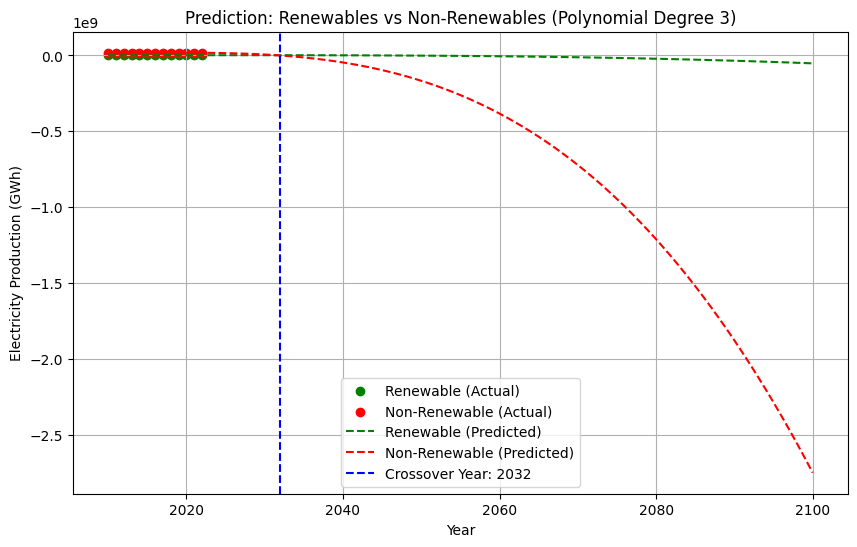

In [19]:
# -----------------------------
# 7. Plot the results
# -----------------------------
plt.figure(figsize=(10, 6))
plt.scatter(yearly_totals['year'], yearly_totals['Renewable'], label="Renewable (Actual)", color="green")
plt.scatter(yearly_totals['year'], yearly_totals['Non-Renewable'], label="Non-Renewable (Actual)", color="red")
plt.plot(future_years, pred_renew, '--', color="green", label="Renewable (Predicted)")
plt.plot(future_years, pred_nonrenew, '--', color="red", label="Non-Renewable (Predicted)")

if crossover_year:
    plt.axvline(crossover_year, color="blue", linestyle="--", label=f"Crossover Year: {crossover_year}")

plt.xlabel("Year")
plt.ylabel("Electricity Production (GWh)")
plt.title(f"Prediction: Renewables vs Non-Renewables (Polynomial Degree {degree})")
plt.legend()
plt.grid(True)
plt.show()